<a href="https://colab.research.google.com/github/ppijbb/Python_Notebook/blob/main/%EC%8B%AC%ED%98%88%EA%B4%80%EC%A7%88%ED%99%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular disease prediction

This code uses 2 algorithms to serve the purpose.
Further imporovement is to made.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns  # plot

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings("ignore") # 경고 숨기기

In [5]:
# load data
df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/심혈관질환.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# drop 'id' column 
#df.drop('id',axis=1,inplace=True)
df['BMI'] = df['weight'] / (df['height']*0.01)**2
columns = ['age','gender','height','weight','BMI','ap_hi','ap_lo','cholesterol','gluc','smoke','active','cardio']
df = df[columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   BMI          70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.000000,17664.000000,19703.000000,21327.000000,23713.000000
gender,70000.0,1.349571,0.476838,1.000000,1.000000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.000000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
BMI,70000.0,27.556513,6.091511,3.471784,23.875115,26.374068,30.222222,298.666667
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.000000,0.000000,0.000000,1.000000


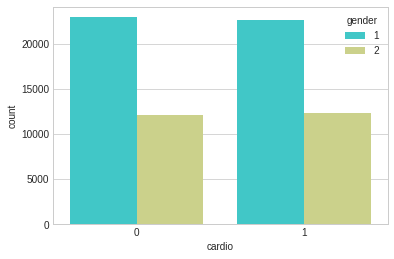

In [9]:
# visualize cardio with gender
plt.style.use('seaborn-whitegrid')

sns.countplot(x='cardio',data=df,hue='gender',palette='rainbow')

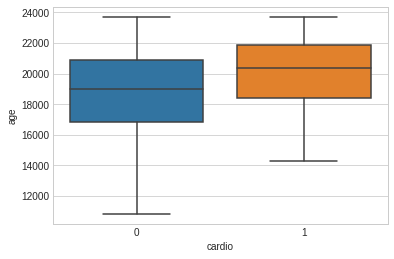

In [10]:
# distribution wrt age
sns.boxplot(x='cardio',y='age',data=df)

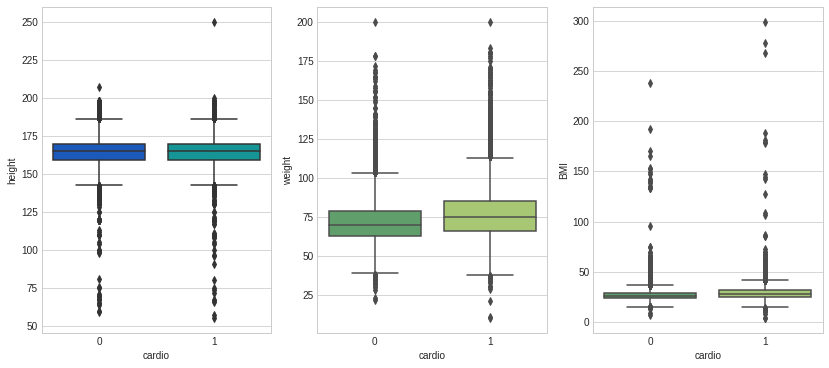

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.boxplot(x='cardio',y='height',data=df,palette='winter')
plt.subplot(1,3,2)
sns.boxplot(x='cardio',y='weight',data=df,palette='summer')
plt.subplot(1,3,3)
sns.boxplot(x='cardio',y='BMI',data=df,palette='summer')

age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
BMI            0.165632
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64


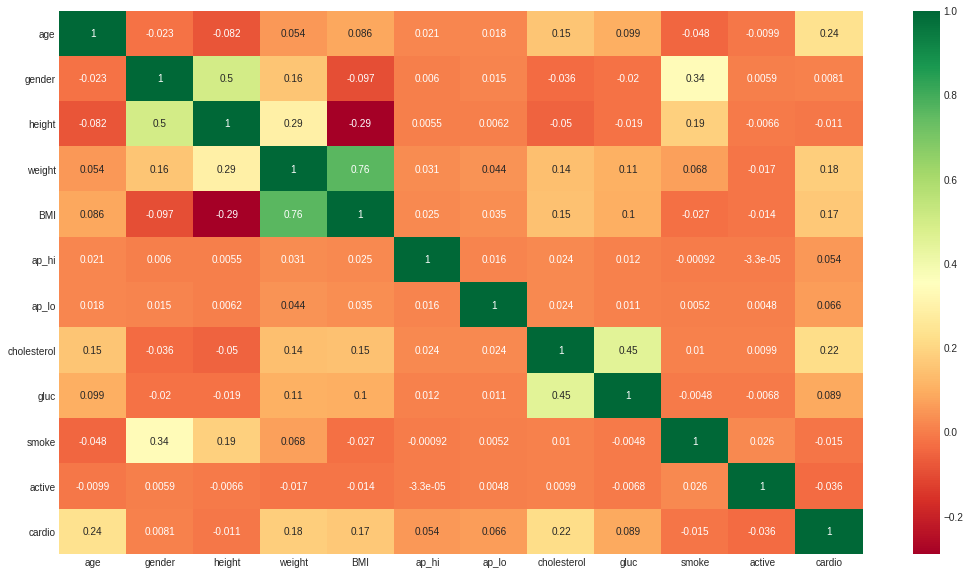

In [12]:
# correlations with target class
correlations = df.corr()['cardio'].drop('cardio')
print(correlations)
plt.figure(figsize=(18,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [13]:
def feat_select(threshold):
    abs_cor = correlations.abs()
    features = abs_cor[abs_cor > threshold].index.tolist()
    return features

In [14]:
def model(mod,X_tr,X_te):
    mod.fit(X_tr,y_train)
    pred = mod.predict(X_te)
    print('Model score = ',mod.score(X_te,y_test)*100,'%')

In [15]:
# split data
msk = np.random.rand(len(df))<0.85
df_train_test = df[msk]
df_val = df[~msk]

X = df_train_test.drop('cardio',axis=1)
y = df_train_test['cardio']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [16]:
threshold = [0.001,0.002,0.005,0.001,0.05,0.1]
lr = LogisticRegression()

for i in threshold:
    print('\n',i)
    feature_i = feat_select(i)
    X_train_i = X_train[feature_i]
    X_test_i = X_test[feature_i]
    model(lr,X_train_i,X_test_i)


 0.001
Model score =  69.50491720601832 %

 0.002
Model score =  69.50491720601832 %

 0.005
Model score =  69.50491720601832 %

 0.001
Model score =  69.50491720601832 %

 0.05
Model score =  58.426494074136336 %

 0.1
Model score =  49.441035555181976 %


In [17]:
scale = StandardScaler()

scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
print(X_train_scaled)
X_train_ = pd.DataFrame(X_train_scaled, columns = X.columns)
X_train_.columns

[[ 0.32998879 -0.7291484   1.55303113 ... -0.39444795 -0.31045172
  -2.03015158]
 [ 0.70763125  1.37146293  0.20198885 ...  1.35414636 -0.31045172
   0.49257406]
 [ 0.32146138 -0.7291484  -0.5349433  ...  1.35414636 -0.31045172
  -2.03015158]
 ...
 [ 0.03071729  1.37146293  1.9214972  ... -0.39444795 -0.31045172
   0.49257406]
 [-0.2697724  -0.7291484  -1.64034152 ... -0.39444795 -0.31045172
   0.49257406]
 [ 1.47875279 -0.7291484  -1.14905342 ... -0.39444795 -0.31045172
   0.49257406]]


Index(['age', 'gender', 'height', 'weight', 'BMI', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'active'],
      dtype='object')

In [18]:
scale.fit(X_test)
X_test_scaled = scale.transform(X_test)
print(X_train_scaled)
X_test_ = pd.DataFrame(X_test_scaled,columns=df.columns[:-1])
X_test_.columns

[[ 0.32998879 -0.7291484   1.55303113 ... -0.39444795 -0.31045172
  -2.03015158]
 [ 0.70763125  1.37146293  0.20198885 ...  1.35414636 -0.31045172
   0.49257406]
 [ 0.32146138 -0.7291484  -0.5349433  ...  1.35414636 -0.31045172
  -2.03015158]
 ...
 [ 0.03071729  1.37146293  1.9214972  ... -0.39444795 -0.31045172
   0.49257406]
 [-0.2697724  -0.7291484  -1.64034152 ... -0.39444795 -0.31045172
   0.49257406]
 [ 1.47875279 -0.7291484  -1.14905342 ... -0.39444795 -0.31045172
   0.49257406]]


Index(['age', 'gender', 'height', 'weight', 'BMI', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'active'],
      dtype='object')

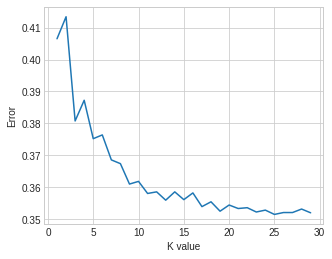

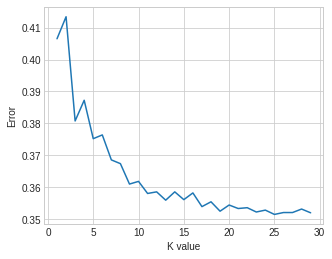

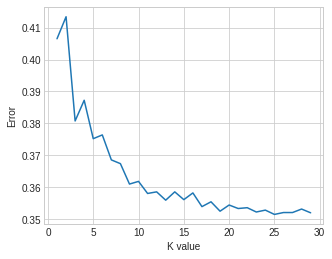

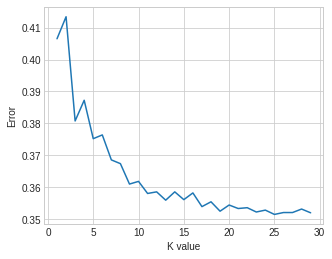

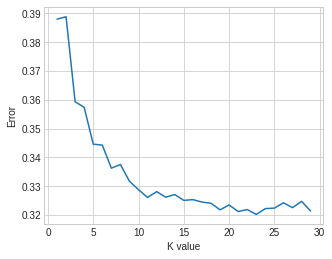

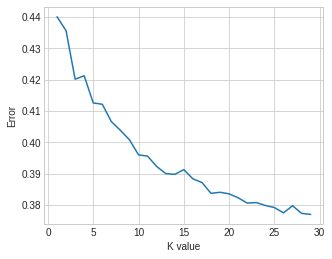

In [19]:
# optimum k with optimum threshold
for i in threshold:
    feature = feat_select(i)
    X_train_k = X_train_[feature]
    X_test_k = X_test_[feature]
    err = []
    for j in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=j)
        knn.fit(X_train_k,y_train)
        pred_j = knn.predict(X_test_k)
        err.append(np.mean(y_test != pred_j))

    plt.figure(figsize=(5,4))
    plt.plot(range(1,30),err)
    plt.xlabel('K value')
    plt.ylabel('Error')

In [20]:
# final feature selection with threshold 0.05
feat_final = feat_select(0.05)
print(feat_final)

['age', 'weight', 'BMI', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']


<Figure size 360x360 with 0 Axes>

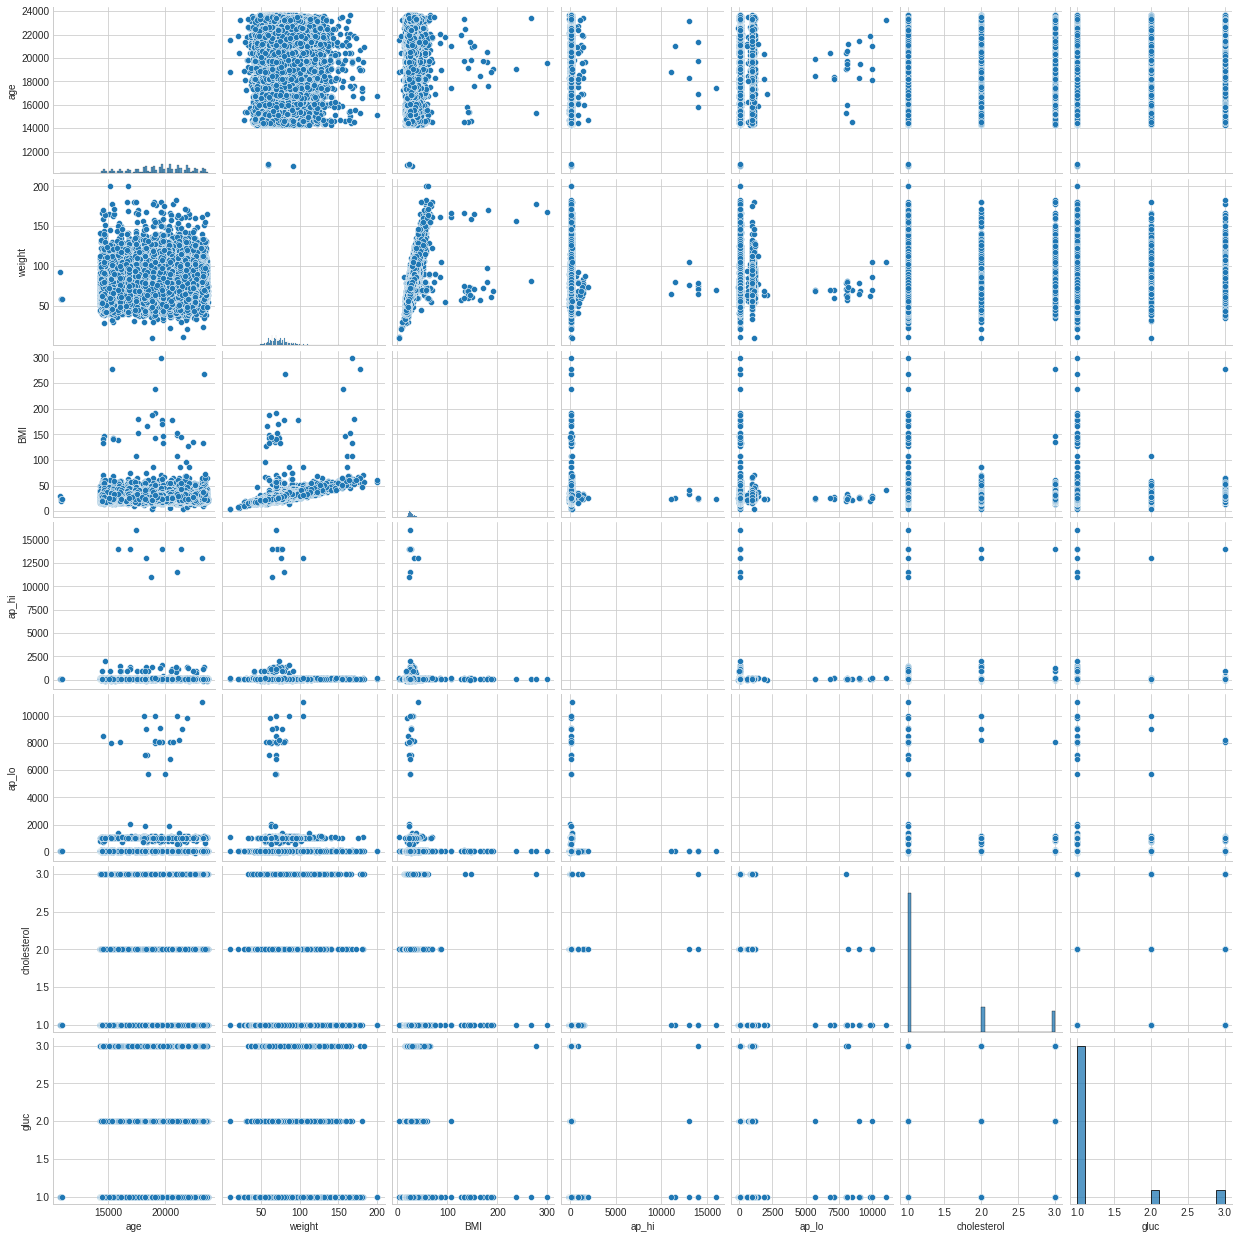

<Figure size 360x360 with 0 Axes>

In [21]:
p=sns.pairplot(df[feat_final])
plt.figure(figsize=(5,5))

In [22]:
# scaling the val data as well
X_train = X_train_[feat_final]
X_test = X_test_[feat_final]
X_val = np.asanyarray(df_val[feat_final])
y_val = np.asanyarray(df_val['cardio'])

scale.fit(X_val)
X_val_scaled = scale.transform(X_val)
X_val_ = pd.DataFrame(X_val_scaled,columns=df_val[feat_final].columns)

# KNN 이용

In [23]:
# knn with k=15
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
pred = knn.predict(X_val_)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.7259372898453261
0.6777338824913843


In [24]:
# reports
print('Confusion Matrix =\n',confusion_matrix(y_val,pred))
print('\n',classification_report(y_val,pred))

Confusion Matrix =
 [[4040 1305]
 [2029 3145]]

               precision    recall  f1-score   support

           0       0.67      0.76      0.71      5345
           1       0.71      0.61      0.65      5174

    accuracy                           0.68     10519
   macro avg       0.69      0.68      0.68     10519
weighted avg       0.69      0.68      0.68     10519



# Logistic Regression 이용

In [25]:
# Logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_val_)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7159759583053127
0.686895856098176


In [26]:
# reports
print('Confusion Matrix =\n',confusion_matrix(y_val,pred))
print('\n',classification_report(y_val,pred))

Confusion Matrix =
 [[3967 1378]
 [1712 3462]]

               precision    recall  f1-score   support

           0       0.70      0.74      0.72      5345
           1       0.72      0.67      0.69      5174

    accuracy                           0.71     10519
   macro avg       0.71      0.71      0.71     10519
weighted avg       0.71      0.71      0.71     10519



# Bagging Classifier 이용

In [29]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.tree import DecisionTreeClassifier

bagging_classifier = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_depth = 5), n_estimators=30, random_state=0)
bagging_classifier.fit(X_train, y_train)
Y_pred = bagging_classifier.predict(X_val).astype(int)
print('train : ',round(bagging_classifier.score(X_train, y_train) * 100, 2))
print('test  : ',round(bagging_classifier.score(X_test, y_test) * 100, 2))
print("f1 : ", f1_score(bagging_classifier.predict(X_test), y_test))

train :  73.47
test  :  72.14
f1 :  0.6865840975701994


# SVM 이용한 분류

In [30]:
from sklearn.svm import SVC, LinearSVC

svc = SVC(kernel='poly',probability=True)
svc.fit(X_train, y_train)
print('train : ',round(svc.score(X_train, y_train) * 100, 2))
print('test  : ',round(svc.score(X_test, y_test) * 100, 2))
print("f1 : ", f1_score(svc.predict(X_test), y_test))

train :  66.97
test  :  64.76
f1 :  0.6865840975701994


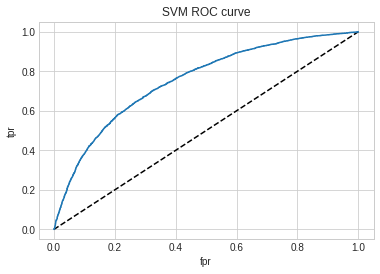

0.7530973234978238

In [31]:
from sklearn.metrics import roc_curve
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
#plt.title('Knn(n_neighbors=11) ROC curve')
#plt.title('Decision Tree(depth = 5) ROC curve')
plt.title('SVM ROC curve')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

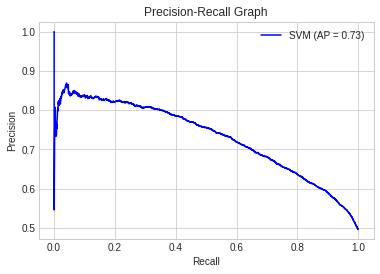

0.7305103589941068


In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_F, recall_F, _ = precision_recall_curve(y_test, y_pred_proba)
ap_F = average_precision_score(y_test, y_pred_proba)

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'SVM (AP = %0.2F)'%ap_F)  
plt.legend(loc='upper right')
plt.show()

print(average_precision_score(y_test, y_pred_proba))

# Decision Tree 이용

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth = 10)
decision_tree.fit(X_train, y_train)
print('train : ',round(decision_tree.score(X_train, y_train) * 100, 2))
print('test : ',round(decision_tree.score(X_test, y_test) * 100, 2))
print("f1 : ", f1_score(decision_tree.predict(X_test), y_test))

train :  75.24
test :  67.65
f1 :  0.6080847164239893


# Random Foresst 이용

In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

random_forest = GridSearchCV(estimator=RandomForestClassifier(criterion='gini', max_depth=20), param_grid={'n_estimators': [10, 30]}, cv=5).fit(X_train, y_train) 

random_forest.fit(X_train, y_train)
print('train : ',round(random_forest.score(X_train, y_train) * 100, 2))
print('test : ',round(random_forest.score(X_test, y_test) * 100, 2))
print("f1 : ", f1_score(random_forest.predict(X_test), y_test))

train :  88.89
test :  69.08
f1 :  0.640398904966758


# Keras MLP 이용 이진분류 이용

Epoch 1/10
1487/1487 [==============================] - 4s 2ms/step - loss: 0.8555 - accuracy: 0.5989
Epoch 2/10
1487/1487 [==============================] - 4s 2ms/step - loss: 0.6116 - accuracy: 0.6875
Epoch 3/10
1487/1487 [==============================] - 4s 2ms/step - loss: 0.5582 - accuracy: 0.7257
Epoch 4/10
1487/1487 [==============================] - 4s 2ms/step - loss: 0.5572 - accuracy: 0.7263
Epoch 5/10
1487/1487 [==============================] - 4s 2ms/step - loss: 0.5512 - accuracy: 0.7281
Epoch 6/10
1487/1487 [==============================] - 4s 2ms/step - loss: 0.5503 - accuracy: 0.7292
Epoch 7/10
1487/1487 [==============================] - 3s 2ms/step - loss: 0.5477 - accuracy: 0.7350
Epoch 8/10
1487/1487 [==============================] - 4s 3ms/step - loss: 0.5502 - accuracy: 0.7273
Epoch 9/10
1487/1487 [==============================] - 4s 2ms/step - loss: 0.5474 - accuracy: 0.7317
Epoch 10/10
1487/1487 [==============================] - 4s 2ms/step - loss: 0.553

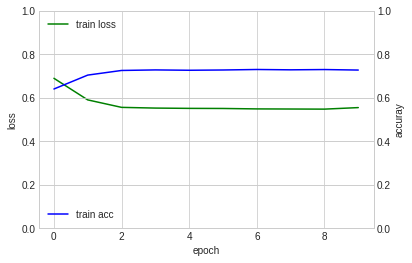

329/329 [==============================] - 1s 2ms/step - loss: 0.5422 - accuracy: 0.7396
loss_and_metrics : [0.5422140955924988, 0.7396140098571777]


In [58]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import random

# 1. 데이터셋 생성하기
'''
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))
'''
x_train = X_train_[feat_final]
x_val = np.asanyarray(df_val[feat_final])
y_val = np.asanyarray(df_val['cardio'])

scale.fit(x_val)
x_val_scaled = scale.transform(x_val)
x_val_ = pd.DataFrame(x_val_scaled,columns=df_val[feat_final].columns)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(Dense(124, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='relu'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=32)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'g', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_val_, y_val, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

>  # 건강검진 데이터 처리를 하는 부분

In [ ]:
samdata= pd.read_csv('/content/drive/My Drive/Colab Notebooks/검진추출데이터.csv')
samdata = samdata.drop(['Unnamed: 0'], axis = 1)
samdata.columns

Index(['성별코드', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '나이',
       'BMI', '총콜레스테롤분위', '대사증후군'],
      dtype='object')

In [ ]:
def cole(i,df):
  if df.loc[i,'식전혈당(공복혈당)'] < 100:
    df.loc[i,'공복혈당분위'] = 1
  elif df.loc[i,'식전혈당(공복혈당)'] >=100 and df.loc[i,'식전혈당(공복혈당)'] <= 126:
    df.loc[i,'공복혈당분위'] = 2
  elif df.loc[i,'식전혈당(공복혈당)'] >= 126:
    df.loc[i,'공복혈당분위'] = 3

In [ ]:
total = tqdm_notebook(range(len(samdata))) 
for i in total:
  cole(i,samdata)

In [ ]:
data = samdata[['나이','체중(5Kg단위)','BMI','수축기혈압','이완기혈압','총콜레스테롤분위','공복혈당분위']].copy(deep=True)
data['나이'] = data['나이']*365
data.describe()

,나이,체중(5Kg단위),BMI,수축기혈압,이완기혈압,총콜레스테롤분위,공복혈당분위
count,90655.000000,90578.000000,90578.000000,90643.000000,90643.000000,90651.000000,90650.000000
mean,16547.820859,63.260891,23.859600,122.261123,75.998842,1.554434,1.434087
std,5196.365620,12.747921,3.611247,14.565046,9.917108,0.699824,0.625008
min,6570.000000,25.000000,11.111111,70.000000,40.000000,1.000000,1.000000
25%,12045.000000,55.000000,21.484375,111.000000,70.000000,1.000000,1.000000
50%,15695.000000,60.000000,23.781213,120.000000,76.000000,1.000000,1.000000
75%,19345.000000,70.000000,25.951557,130.000000,81.000000,2.000000,2.000000
max,30295.000000,170.000000,63.492063,230.000000,150.000000,3.000000,3.000000


0    64536
1    26119
Name: 예측, dtype: int64


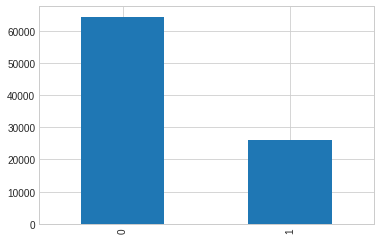

In [ ]:
data.fillna(data.median(), inplace = True)
X_val = np.asanyarray(data)
X_train_scaled = scale.transform(X_val)
pred = svc.predict(X_train_scaled)
pred = pd.DataFrame(pred,columns=['예측'])
#pred[['심혈관O']],pred[['심혈관X']]= svc.predict_proba(X_train_scaled)
print(pred.예측.value_counts())
p=pred.예측.value_counts().plot(kind="bar")

In [ ]:
samdata[['심혈관질환예측','심혈관X','심혈관O']]  = pred
samdata.to_csv("/content/drive/My Drive/Colab Notebooks/검진16_심혈관예측확률.csv",encoding='utf-8_sig')

0    685383
1    314617
Name: 예측, dtype: int64


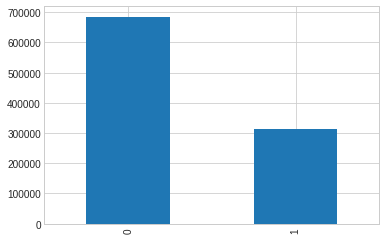

In [ ]:
samdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/검진추출데이터_백만.csv')
samdata = samdata.drop(['Unnamed: 0'], axis = 1)

total = tqdm_notebook(range(len(samdata))) 
for i in total:
  cole(i,samdata)

data = samdata[['나이','체중(5Kg단위)','BMI','수축기혈압','이완기혈압','총콜레스테롤분위','공복혈당분위']].copy(deep=True)
data['나이'] = data['나이']*365

data.fillna(data.median(), inplace = True)
X_val = np.asanyarray(data)
X_train_scaled = scale.transform(X_val)
pred = bagging_classifier.predict(X_train_scaled)
pred = pd.DataFrame(pred,columns=['예측'])
pred[['심혈관O','심혈관X']]  = bagging_classifier.predic_proba(X_train_scaled)
print(pred.예측.value_counts())
p=pred.예측.value_counts().plot(kind="bar")

In [ ]:
samdata[['심혈관질환예측','심혈관O','심혈관X']]  = pred
samdata.to_csv("/content/drive/My Drive/Colab Notebooks/검진16_백만_심혈관예측추가.csv",encoding='utf-8_sig')